In [1]:
import numpy as np
import pylab as py

# Maszyny Wektorów Nośnych 2

# Powtórka 
* warunki KKT

Dla Lagrangianu z mnożnikami $\alpha _{i}$ i $\beta _{i}$:

$\qquad 
\mathcal {L}(w,\alpha ,\beta ) = f(w) + \sum _{i=1}^{k} \alpha _{i}g_{i}(w) + \sum _{i=1}^{k} \beta _{i}h_{i}(w)
$

gdy spełnione warunki Karush-Kuhn-Tucker'a (KKT):

$\begin{matrix}
(1) &\frac{\partial }{\partial w_{i}} \mathcal {L} (w^{*},\alpha ^{*},\beta ^{*})&=& 0 , \quad i = 1,\dots ,k \\
(2) &\frac{\partial }{\partial \beta _{i}} \mathcal {L} (w^{*},\alpha ^{*},\beta ^{*})&=& 0 , \quad i = 1,\dots ,l \\
(3) &\alpha _{i}^{*} g_{i}(w^{*}) &=&0, \quad i = 1,\dots ,k \\
(4) &g_{i}(w^{*}) &\le & 0, \quad i =1,\dots ,k \\
(5) &\alpha ^{*} &\ge & 0, \quad i=1,\dots ,k
\end{matrix}$

to 

$\begin{matrix}
d^{*} &=& \max _{\alpha ,\beta : \alpha _{i}\ge 0} \min _{w} \mathcal {L}(w,\alpha ,\beta ) \\
&=&
\min _{w} \max _{\alpha ,\beta : \alpha _{i}\ge 0} \mathcal {L}(w,\alpha ,\beta ) =p^{*}
\end{matrix}$

## SVM w formaliźmie Lagranga

Problem znalezienia klasyfikatora optymalnego pod względem marginesów można wyrazić w następujący sposób:

$\qquad$ $\begin{matrix}
\min _{w,b} \frac{1}{2}||w||^{2}&\\
\text{p.w.: } &y^{(j)}(w^{T}x^{(j)}+b) \ge 1, \quad j= 1, \dots ,m
\end{matrix}$

Można go przepisać w takiej postaci aby pasowała do formalizmu uogólnionej metody Lagrangea, którą omówiliśmy na poprzednim wykładzie:

$\begin{matrix}
\min _{ w,b} \frac{1}{2}||w||^{2}&\\
\text{p.w.: }& g_{j}(w,b) = 1 - y^{(j)}(w^{T}x^{(j)}+b) \le 0, \quad j= 1, \dots ,m
\end{matrix}$

Lagrangian dla problemu SVM w postaci pierwotnej wygląda tak:

$\mathcal {L}(w,b,\alpha ) = \frac{1}{2}||w||^{2} + \sum _{j=1}^{m} \alpha _{j}g_j(w,b)=$

$\qquad \qquad = \frac{1}{2}||w||^{2} + \sum _{j=1}^{m} \alpha _{j}\left[1 - y^{(j)}(w^{T}x^{(j)}+b) \right]=$

$\qquad \qquad =\frac{1}{2}||w||^{2} - \sum _{j=1}^{m} \alpha _{j}\left[ y^{(j)}(w^{T}x^{(j)}+b) -1\right]$

* W Lagrangianie występują tylko mnożniki $\alpha $, ponieważ mamy więzy tylko w postaci nierówności.
* Każdy przykład $j$ z ciągu uczącego dodaje nam jeden wiąz $g_{j}$. 
* Do uogólnianego Lagrangianu warunki te wchodzą z wagami $\alpha _{j}$.
* z (5) warunku KKT $\alpha_j >0 $
* z (4) warunku KKT $g_j(w,b) \le 0 $, spełnienie tego warunku gwarantuje to, że najgorsze marginesy są 1
* z (3) warunku KKT wynika, że, tylko te $\alpha _{j}$ są $>0$), dla których warunek jest spełniony z równością, tzn. $g_{j}(w,b) = 0$. 
* warunek (2) nas nie dotyczy, bo nie mamy więzów w postaci równości

> przykłady $j$, dla których zachodzi warunek (3) to punkty położone najbliżej hiperpowierzchni decyzyjnej. 
> * To właśnie te punkty nazywane są wektorami nośnymi. 

## Przejście do postaci dualnej

* Pozwoli nam to na rozwiązywanie problemów, które nie są separowalne liniowo.
* Najpierw uzyskajmy $\theta _{d}(\alpha) = \min _{w,b} \mathcal {L}(w,b,\alpha)$

* Aby to uczynić musimy zminimalizować $\mathcal {L}$ po $w$ i $b$, trzymając $\alpha $ stałe. W tym celu policzymy pochodną $\mathcal {L}$ po $w$ i po $b$ i położymy je równe zero:

$\qquad 
\nabla _{w} \mathcal {L}(w,b,\alpha ) = \nabla _{w} \left\{\frac{1}{2}||w||^{2} - \sum _{j=1}^{m} \alpha _{j}\left[ y^{(j)}(w^{T}x^{(j)}+b) -1\right] \right\}$

$\qquad \qquad \qquad \quad = 
w - \sum _{j=1}^{m}\alpha _{j}y^{(j)}x^{(j)} =0
$

Stąd:

$w^* = \sum _{j=1}^{m}\alpha _{j}y^{(j)}x^{(j)}$

Dla $b$ mamy:

$\frac{\partial }{\partial b} \mathcal {L}(w,b,\alpha ) = \sum _{j=1}^{m} \alpha _{j}y^{(j)} =0$

Jeśli teraz weźmiemy $w^*$  i wstawimy do Lagrangianu  $\mathcal {L}$ to otrzymamy:

$\qquad$ $
\theta _{d}= \min _{w,b}\mathcal {L}(w,b,\alpha ) = \sum _{j=1}^{m}\alpha _{j} - \frac{1}{2}\sum _{i,j =1}^{m} y^{(i)}y^{(j)} \alpha _{i}\alpha _{j} (x^{(i)})^{T}x^{(j)} - b \sum _{j=1}^{m}\alpha _{j}y^{(j)}
$

Ale z równania na $b$ wynika, że ostatni człon tego wyrażenia jest równy zero, więc mamy:

$\qquad$ $
\theta _{d}= \min _{w,b}\mathcal {L}(w,b,\alpha ) = \sum _{j=1}^{m}\alpha _{j} - \frac{1}{2}\sum _{i,j =1}^{m} y^{(i)}y^{(j)} \alpha _{i}\alpha _{j} (x^{(i)})^{T}x^{(j)}
$

*  wyrażenie $(x^{(i)})^{T}x^{(j)}$ to iloczyn skalarny wektorów $x^{(i)}$ oraz $x^{(j)}$, 
  * bedziemy je dalej zapisywać jako $\langle x^{(i)},x^{(j)}\rangle $.
* Zatem nasz dualny problem optymalizacyjny można zapisać tak:


$\begin{matrix}
\max _{\alpha } \theta _{d} &= &\sum _{j=1}^{m}\alpha _{j} - \frac{1}{2}\sum _{i,j =1}^{m} y^{(i)}y^{(j)} \alpha _{i}\alpha _{j} \langle x^{(i)}, x^{(j)}\rangle \\
\text{pod warunkiem: }&& \alpha _{j}\ge 0, \quad j=1,\dots ,m\\
&& \sum _{j=1}^{m}\alpha _{j}y^{(j)} = 0
\end{matrix}$

Spełnione są warunki KKT (warunek 1 spełniliśmy licząc $w^*$), zatem rozwiązanie tego problemu dualnego jest też rozwiązaniem naszego problemu pierwotnego.

## Quiz
* Jak przejść od problemu pierwotnego do dualnego?

## Wyznaczenie parametrów modelu:

Zakładając, że mamy algorytm znajdujący $\alpha ^{*}$, które maksymalizują $\theta _{d}$  możemy podstawić to $\alpha ^{*}$ do równania ($w^* = \sum _{j=1}^{m}\alpha _{j}y^{(j)}x^{(j)}$) i wyznaczyć $w^{*}$:


$w^{*} = \sum _{j=1}^{m}\alpha _{j}^{*}y^{(j)}x^{(j)}$

a następnie obliczyć optymalne $b$ ze wzoru:

$\qquad$ $b^{*} = - \frac{\max _{j:y^{(j)} = -1}{w^{*}}^{T}x^{(j)} + \min _{j:y^{(j)} = 1}{w^{*}}^{T}x^{(j)} }{2}$

Mając $w$ oraz $b$ możemy wtedy bez problemu otrzymać nasze szukane marginesy

## Klasyfikacja:

* Klasyfikując nowy przypadek $x$ musielibyśmy policzyć ${w^{*}}^{T}x + b^{*}$ i jeśli otrzymamy wartość ujemną to klasyfikujemy $x$ jako typ $-1$ a w przeciwnym wypadku jako 1:

$\begin{matrix}
{w^{*}}^{T}x + b^{*} &=& \left( \sum _{j=1}^{m} \alpha _{j}^{*}y^{(j)}x^{(j)}\right)^{T} x + b^{*} \\
&=&\sum _{j=1}^{m} \alpha _{j}^{*}y^{(j)} \langle x^{(j)}, x \rangle + b^{*} 
\end{matrix}$

Zatem aby wykonać klasyfikację nowego przypadku $x$ musimy obliczyć jego iloczyn skalarny z wektorami nośnymi ze zbioru uczącego (tymi, dla których $\alpha _{j}^{*} > 0$, dla pozostałych wektorów w zbiorze uczącym $\alpha _{j}^{*}=0$), a tych jak już wcześniej wspominaliśmy jest zazwyczaj niewiele.

## Quiz
* Co to są wektory nośne?

## Funkcje jądrowe
Samo obliczanie iloczynów skalarnych można przeprowadzić bardzo wydajnie stosując odpowiednie funkcje jądrowe.



### Mapowanie do przestrzeni wielowymiarowych
* Nasze dotychczasowe algorytmy klasyfikacyjne, były ograniczone do rozwiązywania problemów separowalnych liniowo. 
* Okazuje się jednak, że często można uczynić problem separowalnym liniowo poprzez przemapowanie oryginalnych danych wejściowych do jakiejś więcej wymiarowej przestrzeni. 

### Przykład
Dla przykładu rozważmy dwa zbiory punktów jednowymiarowych. Jeden zbiór skupiony jest wokół zera, a drugi rozłożony równomiernie po lewej i prawej jego stronie. Przechodząc ze zmiennych $x$ do $(x,x^{2})$ punkty stają się liniowo separowalne.

Wykonajmy ilustrację tego przykładu.

Definiujemy ciąg uczący:

In [5]:
x = np.arange(-5,5,0.5)
y = np.ones(x.shape)  
y[x<-2] = -1
y[x>2 ] = -1

Problem jest 1-wymiarowy i wygląda tak:

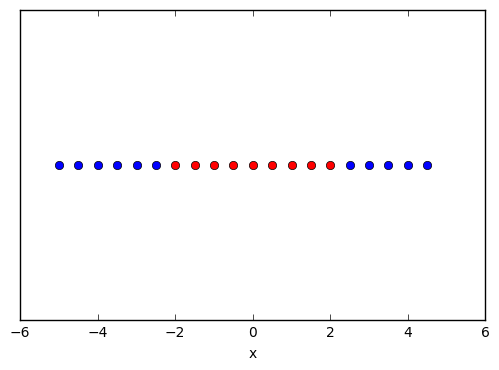

In [ ]:
py.plot(x[y==1], 0*x[y ==1],'ro')
py.plot(x[y==-1], 0*x[y ==-1],'bo')    
py.xlabel("x")
fr = py.gca()
fr.axes.get_yaxis().set_visible(False)
py.show()

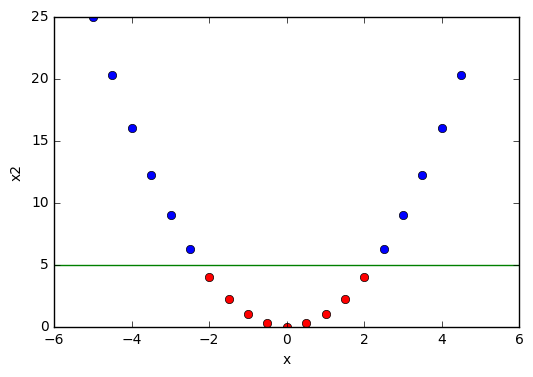

In [ ]:
x2 = x**2
py.plot(x[y==1], x2[y ==1],'ro')
py.plot(x[y==-1], x2[y ==-1],'bo')
py.xlabel("x")
py.ylabel("x2")
py.plot([-6, 6],[5,5],'g')
py.show()

Teraz już nie ma problemu aby rozseparować dane liniowo!

## Funkcja mapująca
W ogólności wprowadzimy funkcję mapującą $\phi (x)$, która przenosi punkty z oryginalnej przestrzeni wejściowej do rozszerzonej przestrzeni cech. W powyższym przykładzie byłoby to:

$\qquad$ $
\phi (x) = \left[\begin{array}{c}
x\\
x^{2} \end{array}\right]
$

* Aby skorzystać z takiego mapowania wystarczy w naszych algorytmach uczących zamienić wszędzie $x$ na $\phi (x)$.
* Podobnie możemy postąpić z algorytmem SVM. 
* W postaci dualnej algorytm SVM jest wyrażony całkowicie przez iloczyny skalarne. 
* Możemy zastąpić wszystkie wyrażenia $\langle x, z \rangle $ przez $\langle \phi (x), \phi (z) \rangle $. 

## Jądra
Dla danego mapowania $\phi $ zdefiniujemy jądro (kernel):

$\qquad$ $
K(x,z) = \phi (x)^{T}\phi (z)
$
* Jest to funkcja zwracająca iloczyn skalarny zmapowanych wektorów. 

* wszędzie gdzie w algorytmie występuje $\langle x,z \rangle $ wstawiamy $K(x,z)$ i otrzymujemy algorytm działający w przestrzeni, do której mapuje $\phi $. 

### Sprytne liczenie iloczynów skalarnych: 
* W wielu przypadkach, aby obliczyć $K(x,z)$ nie musimy wcale przechodzić całej drogi: 

$\qquad$ $x \rightarrow \phi (x) \rightarrow \langle \phi (x),\phi (z) \rangle $ 

(taka droga zresztą mogła by być niewykonalna, np. w przypadku mapowania do przestrzeni nieskończenie wymiarowej). 

### Przykład:


$K(x,z) = ( x^{T}z)^{2}$

Rozpisując to wyrażenie na współrzędne otrzymujemy:

$\qquad$ $\begin{matrix}
K(x,z) &=& \left(\sum _{i=1}^{m}x_{i}z_{i} \right) \left(\sum _{j=1}^{m}x_{j}z_{j}\right)\\
&=& \sum _{i=1}^{m}\sum _{j=1}^{m} x_{i}x_{j}z_{i}z_{j}\\
&=& \sum _{i,j=1}^{m}(x_{i}x_{j})(z_{i}z_{j})
\end{matrix}$

Widzimy tu, że jeśli popatrzeć na $K$ tak: $K(x,z) = \phi (x)^{T}\phi (z)$ to owo $K$ związane jest z mapowaniem $\phi $, które w jawnej postaci dla $m=3$ wyglądałoby tak:

$\qquad$ $
\phi (x) = \left[\begin{array}{c}
x_{1}x_{1}\\
x_{1}x_{2}\\
x_{1}x_{3}\\
x_{2}x_{1}\\
x_{2}x_{2}\\
x_{2}x_{3}\\
x_{3}x_{1}\\
x_{3}x_{2}\\
x_{3}x_{3}
\end{array}\right]
$

Zauważmy, że samo obliczenie mapowania w tym przypadku jest operacją o złożoności obliczeniowej $O(m^{2})$ natomiast obliczenie jądra za pomocą równia ($K(x,z) = ( x^{T}z)^{2}$) jest operacją o złożoności obliczeniowej $O(m)$.

Podobne własności ma jądro:

$\qquad$ $
K(x,z) = (x^{T}z + c)^{2} = \sum _{i,j=1}^{m} (x_{i}x_{j})(z_{i}z_{j}) + \sum _{i=1}^{m}(\sqrt{2c}x_{i} )(\sqrt{2c}z_{i}) +c^{2}
$

Jawna postać mapowania odpowiadającego temu jądru wygląda następująco (dla $m=3$):

$\qquad$ $
\phi (x) = \left[\begin{array}{c}
x_{1}x_{1}\\
x_{1}x_{2}\\
x_{1}x_{3}\\
x_{2}x_{1}\\
x_{2}x_{2}\\
x_{2}x_{3}\\
x_{3}x_{1}\\
x_{3}x_{2}\\
x_{3}x_{3} \\
\sqrt{2c}x_{1}\\
\sqrt{2c}x_{2}\\
\sqrt{2c}x_{3}\\
c
\end{array}\right]
$

czyli zawiera zarówno wyrazy pierwszego rzędu ($x_{i}$) oraz drugiego rzędu ($x_{i}x_{j}$). Parametr $c$ kontroluje względny udział części liniowej.

W ogólności jądro postaci $K(x,z) = (x^{T}z + c)^{d}$ odpowiada mapowaniu do $\binom{n+d}{d}$ wymiarowej przestrzeni parametrów, której wymiary są rozpięte przez wszystkie iloczyny typu $x_{i_{1}},x_{i_{2}},\dots ,x_{i_{k}}$ aż do rzędu $d$. Dzięki sztuczce z jądrem nigdy nie musimy jawnie obliczać tych wielowymiarowych wektorów i obliczenia nadal mają złożoność $O(m)$.

## Quiz
* Co robi funkcja mapująca?

* co robi funkcja jądrowa?

## Jakie są inne dobre funkcje jądrowe?
> Na jądro możemy patrzeć jak na funkcję, która jest jakąś miarą podobieństwa pomiędzy wektorami cech.

* W szczególności gdyby nasze wektory cech były znormalizowane do jedynki to duża wartość jądra $K(x,z) = \phi (x)^{T}\phi (z)$ odpowiadałaby wektorom bardzo podobnym, zaś wartość jądra bliska zeru odpowiadałaby wektorom cech, które są do siebie prawie ortogonalne, tzn. mało podobne.

* Idąc tym tropem możemy zapostulować także inne funkcje jądra, które w jakimś sensie mogłyby stanowić miarę podobieństwa między wektorami. 
* Popularną funkcją jest np. funkcja Gaussa, prowadząca do <b>jądra Gaussowskiego</b> następującej postaci:

$\qquad$ $
K(x,z) = \exp \left( - \frac{||x-z||^{2}}{2 \sigma ^{2}}\right)
$

![]()
<img src="https://image.slidesharecdn.com/svm-140807035301-phpapp01/95/support-vector-machine-without-tears-28-638.jpg?cb=1407384107" width=1600>

> Jak w ogólności sprawdzić czy wymyślona przez nas funkcja jest dobrym kandydatem na jądro?

* Rozważymy to najpierw na przykładzie a potem podamy ogólne twierdzenie.

### Przykład
Załóżmy, że mamy pewną funkcję $K$, która jest jądrem pewnego mapowania $\phi $. Załóżmy dalej, że mamy pewien zbiór $m$ punktów $\lbrace x^{(1)},\dots ,x^{(m)}\rbrace $. Zdefiniujmy macierz $\mathbf {K}$ zwaną macierzą jądra w taki sposób, że jej $i,j$ element dany jest wzorem:

$\qquad$ $
\mathbf {K}_{i,j} = K(x^{(i)},x^{(j)})
$

* Zauważmy, że macierz ta musi być symetryczna, bo:

$\qquad$ $
\mathbf {K}_{i,j} = K(x^{(i)},x^{(j)}) =\phi (x^{(i)})^{T}\phi (x^{(j)}) = \phi (x^{(j)})^{T}\phi (x^{(i)}) = K(x^{(j)},x^{(i)}) = \mathbf {K}_{j,i}
$

* Druga obserwacja jest następująca:
  * Niech $\phi _{k}(x)$ oznacza $k$-tą współrzędną wektora $\phi (x)$. 
  * Wtedy dla dowolnego wektora $z$ mamy:

$\qquad$ $\begin{matrix}
z^{T}\mathbf {K}z &=& \sum _{i}\sum _{j} z_{i}\mathbf {K}_{i,j}z_{j} \\
&=& \sum _{i}\sum _{j} z_{i}\phi (x^{(i)})^{T}\phi (x^{(j)})z_{j} \\
&=& \sum _{i}\sum _{j} z_{i} \sum _{k} \phi _{k}(x^{(i)})\phi _{k}(x^{(j)})z_{j} \\
&=& \sum _{k}\sum _{i}\sum _{j} z_{i}\phi _{k}(x^{(i)})\phi _{k}(x^{(j)})z_{j} \\
&=& \sum _{k} \left( \sum _{i} z_{i} \phi _{k}(x^{(i)})\right)^{2} \\
&\ge & 0
\end{matrix}$

Ponieważ powyższe obliczenie pokazuje, że dla dowolnego $z$ wyrażenie $z^{T}\mathbf {K}z$ jest nieujemne to oznacza, że macierz $\mathbf {K}$ jest dodatnio określona.

## Twierdzenie Mercera
* Pokazaliśmy w tym przykładzie, że:
 > jeśli mamy jakieś mapowanie $\phi $ i związane z nim jądro $K$ to macierz jądra jest symetryczna i dodatnio określona. 

* Okazuje się, że jest to warunek konieczny i wystarczający, aby funkcja $K$ była jądrem, jest to twierdzenie Mercera.

## Zastosowania podejścia jądrowego
Warto sobie uświadomić, że podejście "jądrowe" ma znacznie szersze zastosowanie niż tylko algorytm SVM. 

* Jeśli tylko jesteśmy w stanie wyrazić algorytm w postaci bazującej na iloczynach skalarnych $\langle x,z \rangle $ (da się to w szczególności zrobić np. dla regresji logistycznej) to zamiana tych iloczynów na funkcje jądra daje nam algorytm działający efektywnie w przestrzeni, do której przenosi nas odwzorowanie $\phi $. 
* Dzięki temu można spowodować, że wiele problemów, które nie są separowalne liniowo w pierwotnej przestrzeni wejść staje się separowalna liniowo w tej nowej, więcej wymiarowej przestrzeni.

## Quiz
* Co to jest liniowa separowalność?

## Regularyzcja i przypadki nieseparowalne liniowo

* Zaprezentowana dotychczas wersja SVM zakładała, że dane są liniowo separowalne. 
* Sztuczka z jądrem mapującym zwiększa co prawda szansę na otrzymanie problemu liniowo separowalnego, ale nie daje na to gwarancji. 
* Co więcej w dotychczasowej wersji nasz algorytm SVM jest bardzo podatny na outliery, czyli przypadki odstające.
(Pokażemy to na ćwiczeniach)

## Jak to poprawić?
Aby poprawić oba te problemy można zastosować regularyzację:

$\qquad$ $\begin{matrix}
\min _{ w, b}&& \frac{1}{2}||w||^{2} + C\sum _{j=1}^{m}\xi _{j}\\
\text{pod warunkiem: }&& y^{(j)}(w^{T}x^{(j)} +b ) \ge 1- \xi _{j}, \quad j=1,\dots ,m\\
&& \xi _{j} \ge 0, \quad j=1,\dots ,m
\end{matrix}$

* Oznacza ona tyle, że zgadzamy się na to, że nie wszystkie marginesy funkcyjne są większe niż 1 (przypomnijmy, że ujemny margines funkcyjny odpowiadał złej klasyfikacji), 
* ale karzemy algorytm za naruszanie tego warunku przez zwiększanie funkcji celu.
* Parametr $C$ kontroluje jak bardzo nie podoba nam się błędne klasyfikowanie przypadków.

### Lagrangian
Formułujemy Lagrangian następującej postaci:

$\qquad$ $
\mathcal {L}(w,b,\xi ,\alpha ,r) = \frac{1}{2}w^{T}w + C\sum _{j=1}^{m}\xi _{j} - \sum _{j=1}^{m}\alpha _{j}[y^{(j)}(x^{T}w +b)-1 +\xi _{j}] - \sum _{j=1}^{m}r_{j}\xi _{j}
$

gdzie $\alpha _{j}\ge 0$ i $r_{j}\ge 0$ są mnożnikami Lagrangea. 

### Przejście do postaci dualnej
Przejście do postaci dualnej polega na:
* policzeniu pochodnej Lagrangianu względem $w$ i $b$, 
* przyrównaniu od zera i podstawieniu otrzymanych wyrażeń ponownie do Lagragianu  
* otrzymujemy problem dualny następującej postaci:


$\begin{matrix}
\max _{\alpha } && \theta _{d}(\alpha ) = \sum _{j=1}^{m}\alpha _{j} - \frac{1}{2} \sum _{i,j =1}^{m} y^{(i)}y^{(j)}\alpha _{i}\alpha _{j} \langle x^{(i)},x^{(j)} \rangle \\
\text{pod warunkiem: } && 0 \le \alpha _{j} \le C, \quad j=1,\dots ,m\\
&&\sum _{j=1}^{m}\alpha _{j}y^{(j)} = 0
\end{matrix}$


Do rozwiązania powyższego problemu dobrze stosuje się algorytm SMO (Sequential Minimal Optimization) [[https://www.researchgate.net/publication/2624239_Sequential_Minimal_Optimization_A_Fast_Algorithm_for_Training_Support_Vector_Machines opis algorytmu zaproponowanego przez J. Platta (1998)]]. Po wyznaczeniu za jego pomocą parametrów $\alpha $ i $b$ można wykonywać predykcję nowych przykładów.

## Algorytm SMO - sekwencyjnej minimalnej optymalizacji

Zanim przejdziemy do omówienia właściwego algorytmu SMO zrobimy dygresję na temat optymalizacji osiowej.

### Optymalizacja osiowa

Załóżmy, że chcemy rozwiązać następujący problem optymalizacyjny bez więzów:

$\qquad$ $
\max _{\alpha } W (\alpha _{1},\dots ,\alpha _{m})
$

Jeśli funkcja $W$ jest wypukła to algorytm, który w pętli kolejno optymalizuje jedno $\alpha _{i}$, trzymając w danym kroku optymalizacyjnym pozostałe alfy stałe, jest zbieżny.

<a title="Nicoguaro [CC BY 4.0 (https://creativecommons.org/licenses/by/4.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Coordinate_descent.svg"><img width="512" alt="Coordinate descent" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Coordinate_descent.svg/512px-Coordinate_descent.svg.png"></a>

### Algorytm SMO

* Chcemy rozwiązać problem optymalizacyjny SVM z regularyzacją. 
* Nie da się do niego zastosować algorytmu optymalizacji osiowej bo drugi warunek narzuca więzy na $\alpha $. 
  * Jeśli ustalimy $m-1$ wartości $\alpha _{j}$ to ostatnia $m$-ta wartość też już jest ustalona:

$\qquad$ $
\alpha _{i}y^{(i)} = -\sum _{j \ne i} \alpha _{j}y^{(j)}
$

Lub korzystając z faktu, że $y^{(i)} = \lbrace -1,1\rbrace $ i mnożąc stronami przez $y^{(i)}$ mamy: $\alpha _{i}= -y^{(i)} \sum _{j \ne i} \alpha _{j}y^{(j)}$.

Zatem najmniejszy możliwy problem optymalizacyjny wymaga jednoczesnej optymalizacji dwóch parametrów $\alpha $.

Najogólniej algorytm SMO wygląda więc następująco:

Powtarzaj, aż zbiegniesz:



* Wybierz parę $\alpha _{i}$ i $\alpha _{j}$ do optymalizacji (na podstawie heurystyki szacującej, która para da największe zbliżenie do maksimum).

*	Popraw $\theta _{d}(\alpha )$ biorąc pod uwagę $\alpha _{i}$ i $\alpha _{j}$ trzymając pozostałe alfy stałe.

Testem na zbieżność są tu warunki KKT, które powinny zostać spełnione z zadaną tolerancją.

Rozważmy krok 2. powyższego algorytmu. Załóżmy, że chcemy wykonać maksymalizację ze względu na parametry $\alpha _{1}$ i $\alpha _{2}$ trzymając pozostałe parametry $\alpha _{3}, \dots ,\alpha _{m}$ stałe. Z drugiego warunku mamy:

<equation id="uid17">
$
\alpha _{1}y^{(1)}+ \alpha _{2}y^{(2)} = - \sum _{i=3}^{m} \alpha _{i} y^{(i)} = \zeta 
$
</equation>

gdzie $\zeta $ jest stałą.
Oznacza to, że punkt $(\alpha _{1},\alpha _{2})$ będący rozwiązaniem musi leżeć na prostej $\alpha _{1}y^{(1)}+ \alpha _{2}y^{(2)} =\zeta $.

(rysunek na tablicy: prosta przecinająca kwadrat [0,C]x[0,C])

Przekształcając powyższe równanie mamy:

$\qquad$ $
\alpha _{1} = \frac{ \zeta -\alpha _{2}y^{(2)} }{ y^{(1)}}
$

Zatem funkcja celu może być zapisana jako:

$\qquad$ $
\theta _{d}(\alpha _{1},\alpha _{2},\alpha _{3},\dots ,\alpha _{m}) = \theta _{d}(\frac{\zeta - \alpha _{2}y^{(2)}}{y^{(1)}}, \alpha _{2},\alpha _{3},\dots ,\alpha _{m})
$

* Ponieważ trzymamy w tym kroku parametry $\alpha _{3}, \dots ,\alpha _{m}$ jako stałe to funkcja celu jest funkcją kwadratową parametru $\alpha _{2}$. 

* Można by ją zapisać w postaci 
$\qquad$ $\theta _{d}(\alpha _{2})=a\alpha _{2}^{2}+b\alpha _{2}+c$
dla odpowiednio dobranych $a,b$ i $c$. 

* Łatwo można zmaksymalizować analitycznie funkcję $\theta _{d}(\alpha _{2})$ w przypadku swobodnym, a następnie przyciąć rozwiązanie do "pudełka" wynikającego z więzów.

## Quiz
* dlaczego rozwiązująć problem SVM rozwiazujemy w każdej iteracji względem dwóch $\alpha$ naraz?